In [39]:
import numpy as np
from datetime import datetime
from pandas import read_table
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import os
import math

import time

import warnings
warnings.simplefilter('ignore')

In [40]:
import sys
sys.path.insert(0, 'funs')
import period_detect_funs

In [41]:
threshold = 3

# functions

In [42]:
def Z_fun(ts):
    mean = np.mean(ts)
    sigma = np.std(ts, ddof = 1)
    
    return mean, sigma

def Z_score_fun(ts):
    eps = 1e-8
    mean, sigma = Z_fun(ts)
    if sigma < 1e-8:
        sigma = 1
    len_ts = len(ts)
    Z_score = np.full(len_ts,np.nan)
    for i in range(len_ts):
        Z_score[i] = (ts[i] - mean)/sigma
    return Z_score

def outlier_detect_with_threshold(ts, threshold):
    outlier_detect_idx = np.array([],dtype = int)
    for i in range(len(ts)):
        if np.abs(ts[i])>threshold:
            outlier_detect_idx = np.append(outlier_detect_idx,i)
    return outlier_detect_idx

# motivation

## periodic with noise

### data

Text(0.5, 1.0, 'time series with period = 40')

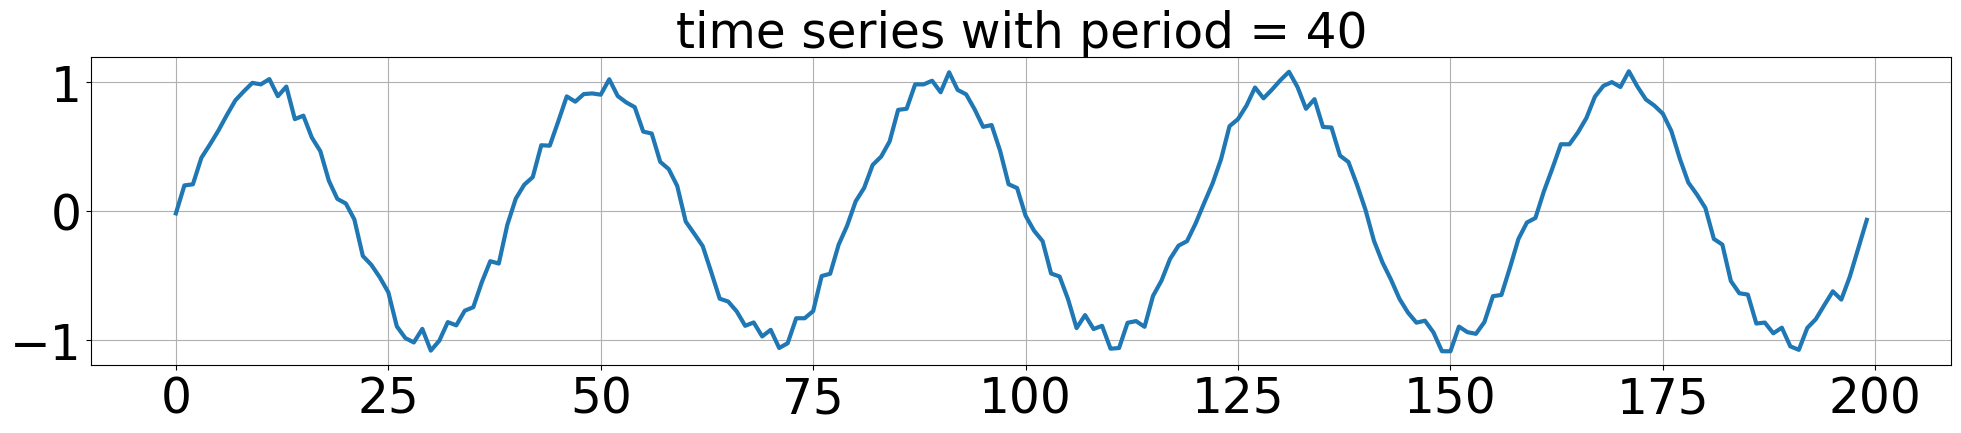

In [43]:
cols = 200 # length of time series
cycle = 40
random_seed = 1
np.random.seed(random_seed)
timestamp = np.full(cols,np.nan,dtype = int)
for i in range(cols):
    timestamp[i] = i
seasonal = np.full(cols,np.nan,dtype = float)
for i in range(cols):
    seasonal[i] = math.sin(2*math.pi/cycle*timestamp[i])
# const = np.full(cols,2,dtype = float)
noise = np.full(cols,0,dtype = float)
for i in range(cols):
    noise[i] = 0.2*(np.random.rand()-0.5)
# trend = 0.01*timestamp
ts = seasonal + noise
plt.figure(figsize = (24,4))
plt.plot(ts,linewidth =3.0)
plt.grid()
plt.tick_params(labelsize = 35)
plt.title('time series with period = 40', fontsize = 35)

### acf with mean

starting computations on 56 cores


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 5446.15it/s]


40
0.805316162240236


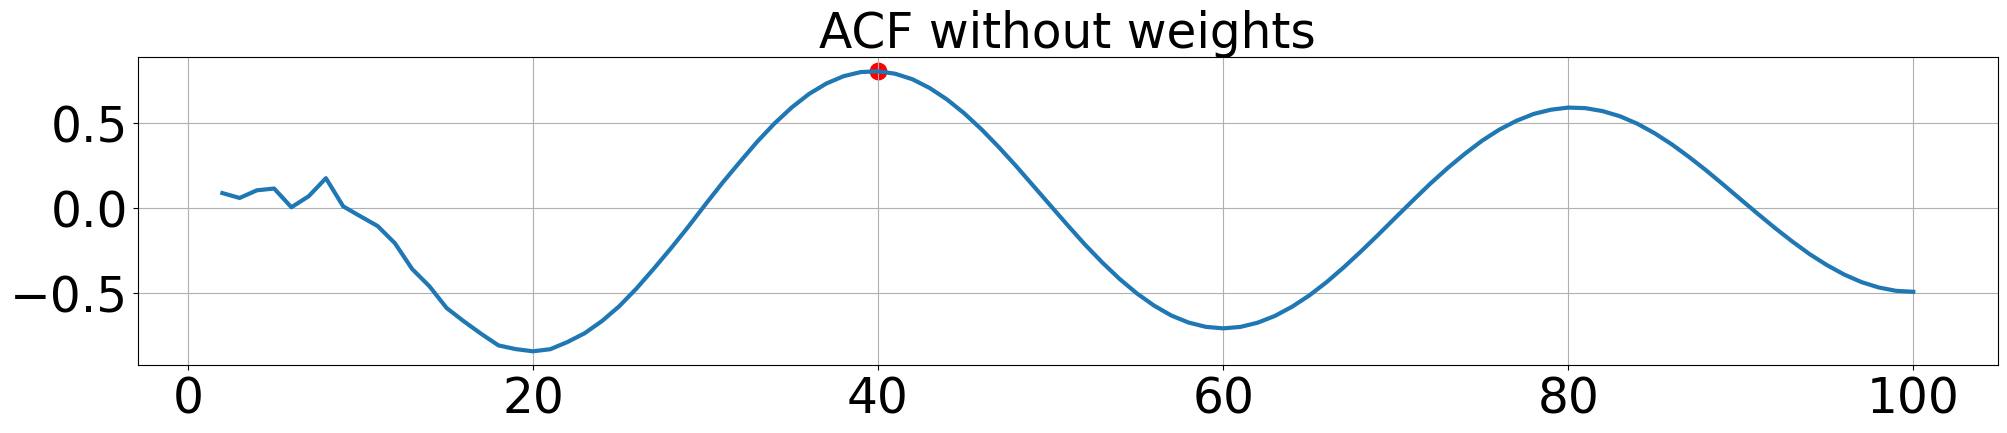

In [44]:
threshold_low = 3
threshold_range = 3
period_set, mean_acf_set, mean_acf_set_no = period_detect_funs.get_mean_acfs(ts, threshold_low, threshold_range)
max_id = np.argmax(mean_acf_set_no)
print(period_set[max_id])
print(mean_acf_set_no[max_id])
plt.figure(figsize = (24,4))
plt.plot(period_set, mean_acf_set_no,linewidth =3.0)
plt.scatter(period_set[max_id], mean_acf_set_no[max_id], color = 'red', s=140)
plt.tick_params(labelsize = 35)
plt.grid()
plt.title('ACF without weights', fontsize = 35)
plt.savefig("plot_for_paper/raw_ts_mean_acf.pdf")

### weighted acf with mean

40
0.8053195553246012


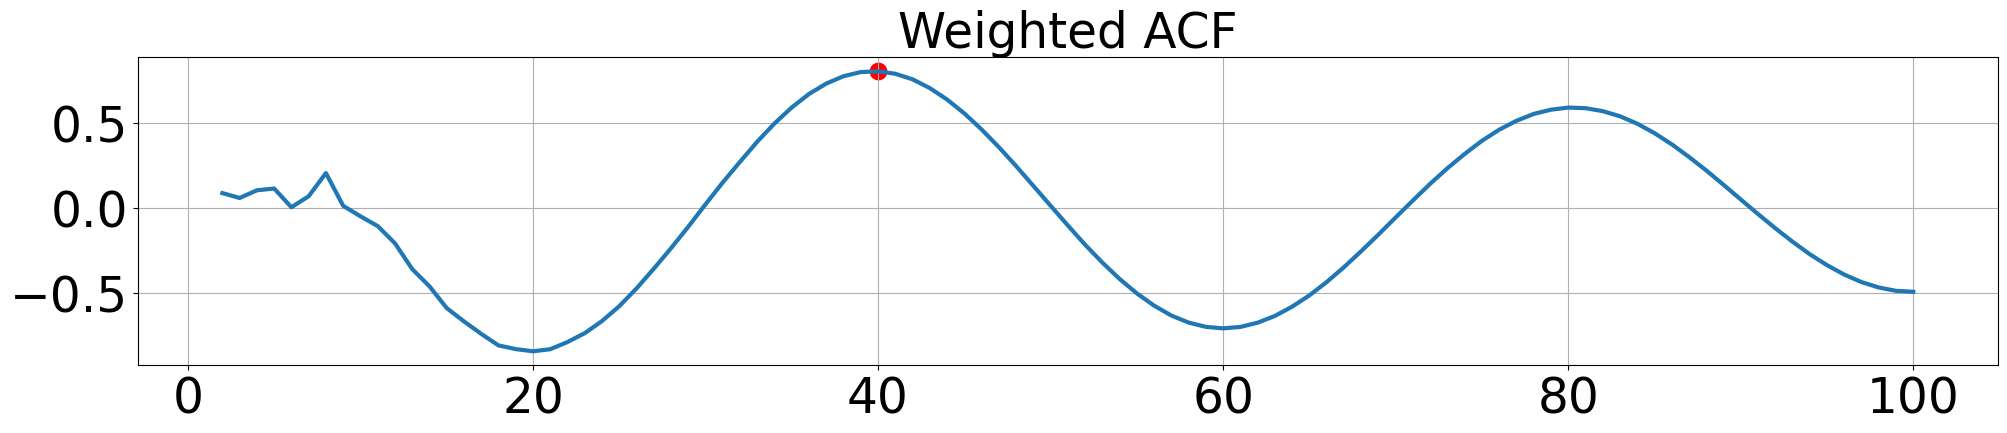

In [45]:
max_id = np.argmax(mean_acf_set)
print(period_set[max_id])
print(mean_acf_set[max_id])
plt.figure(figsize = (24,4))
plt.plot(period_set, mean_acf_set,linewidth =3.0)
plt.scatter(period_set[max_id], mean_acf_set[max_id], color = 'red', s=140)
plt.tick_params(labelsize = 35)
plt.grid()
plt.title('Weighted ACF', fontsize = 35)
plt.savefig("plot_for_paper/raw_ts_weighted_mean_acf.pdf")

## periodic with noise, an outlier

### data

Text(0.5, 1.0, 'time series with period = 40')

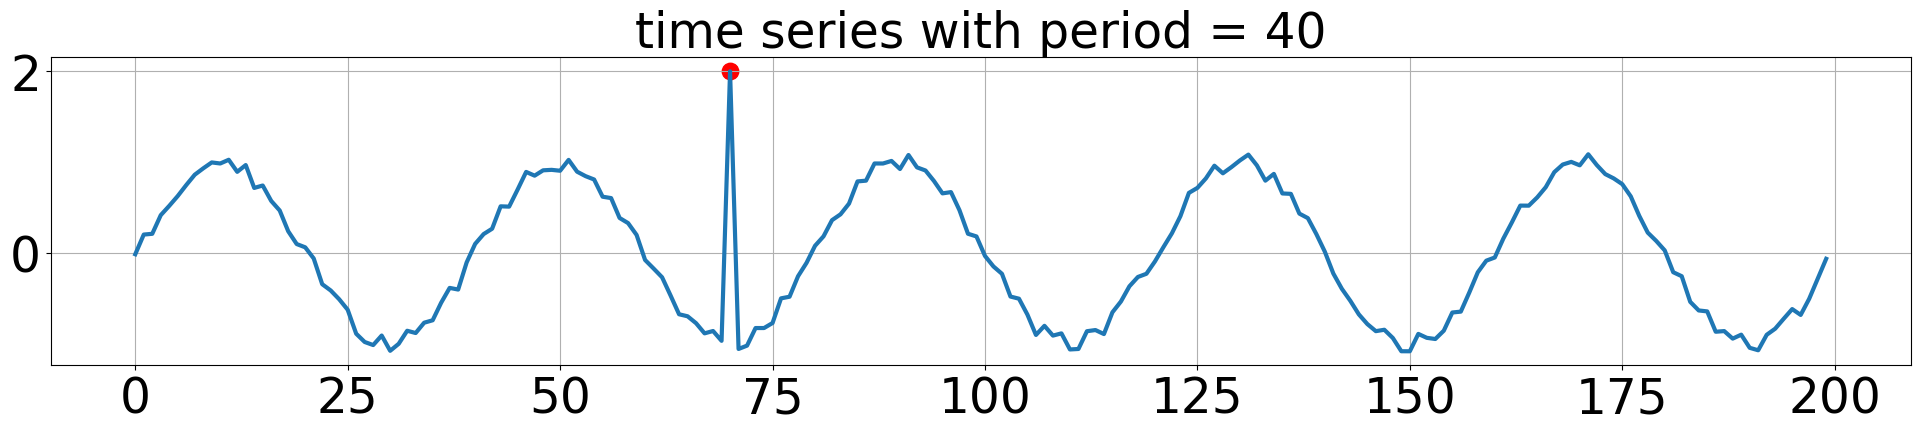

In [46]:
cols = 200 # length of time series
cycle = 40
random_seed = 1
np.random.seed(random_seed)
timestamp = np.full(cols,np.nan,dtype = int)
for i in range(cols):
    timestamp[i] = i
seasonal = np.full(cols,np.nan,dtype = float)
for i in range(cols):
    seasonal[i] = math.sin(2*math.pi/cycle*timestamp[i])
# const = np.full(cols,2,dtype = float)
noise = np.full(cols,0,dtype = float)
for i in range(cols):
    noise[i] = 0.2*(np.random.rand()-0.5)
ts = seasonal + noise
ts[70] = 2
plt.figure(figsize = (24,4))
plt.plot(ts,linewidth =3.0)
plt.scatter(70, ts[70], color = 'red', s=140)
plt.tick_params(labelsize = 35)
plt.grid()
plt.title('time series with period = 40', fontsize = 35)

### acf with mean

starting computations on 56 cores


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 99/99 [00:00<00:00, 4987.28it/s]


39
0.716411582422108


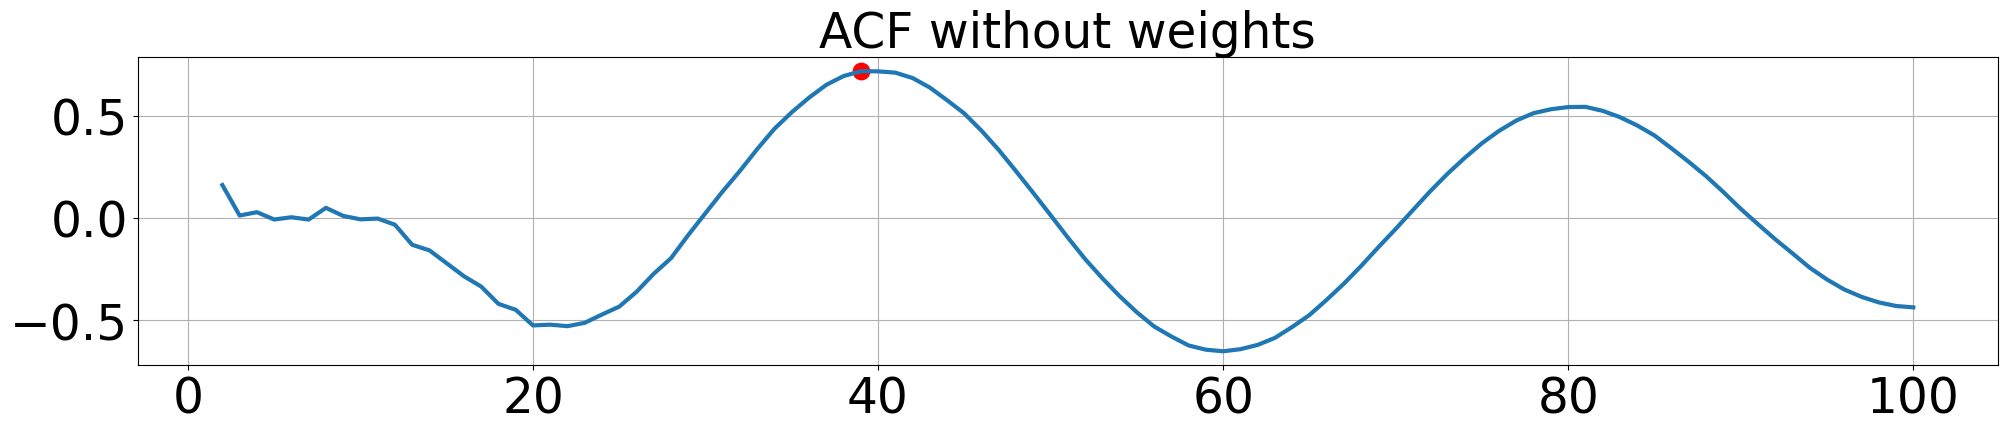

In [47]:
threshold_low = 3
threshold_range = 3
period_set, mean_acf_set, mean_acf_set_no = period_detect_funs.get_mean_acfs(ts, threshold_low, threshold_range)
max_id = np.argmax(mean_acf_set_no)
print(period_set[max_id])
print(mean_acf_set_no[max_id])
plt.figure(figsize = (24,4))
plt.plot(period_set, mean_acf_set_no,linewidth =3.0)
plt.scatter(period_set[max_id], mean_acf_set_no[max_id], color = 'red', s=140)
plt.tick_params(labelsize = 35)
plt.grid()
plt.title('ACF without weights', fontsize = 35)
plt.savefig("plot_for_paper/outlier_ts_mean_acf.pdf")

### weighted acf with mean

40
0.8045194033337555


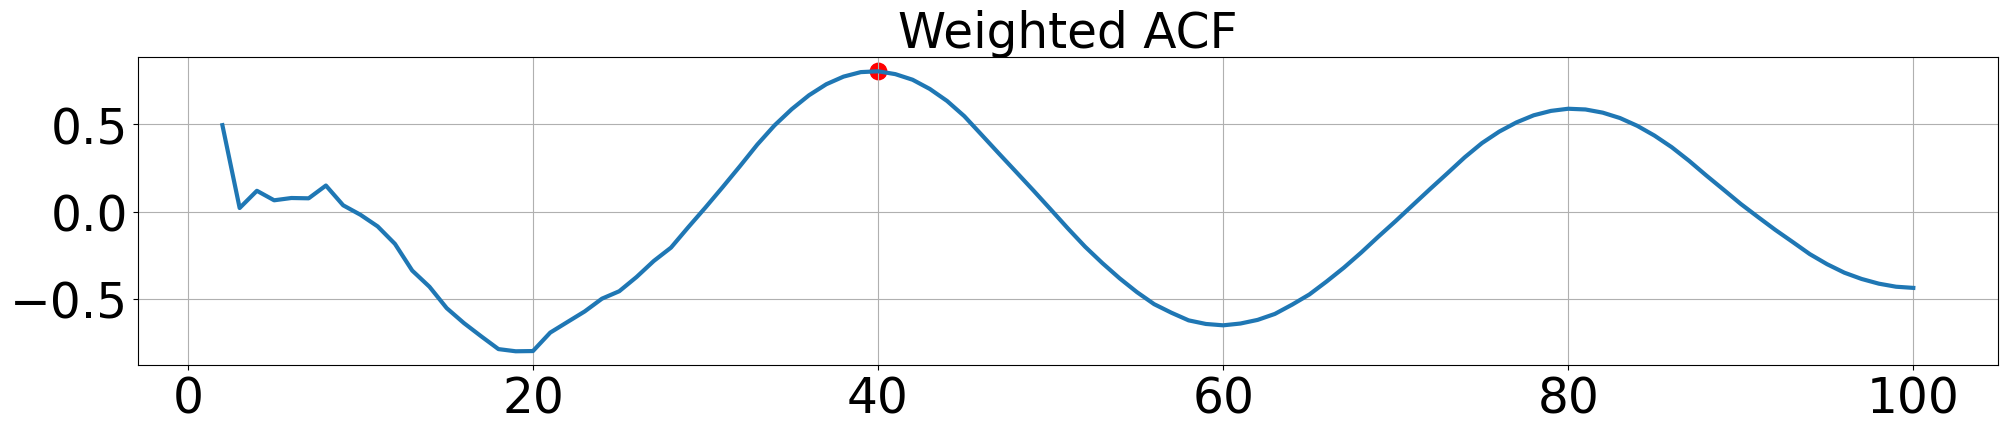

In [48]:
max_id = np.argmax(mean_acf_set)
print(period_set[max_id])
print(mean_acf_set[max_id])
plt.figure(figsize = (24,4))
plt.plot(period_set, mean_acf_set,linewidth =3.0)
plt.scatter(period_set[max_id], mean_acf_set[max_id], color = 'red', s=140)
plt.tick_params(labelsize = 35)
plt.grid()
plt.title('Weighted ACF', fontsize = 35)
plt.savefig("plot_for_paper/outlier_ts_weighted_mean_acf.pdf")

# experiment

## periodic with noise

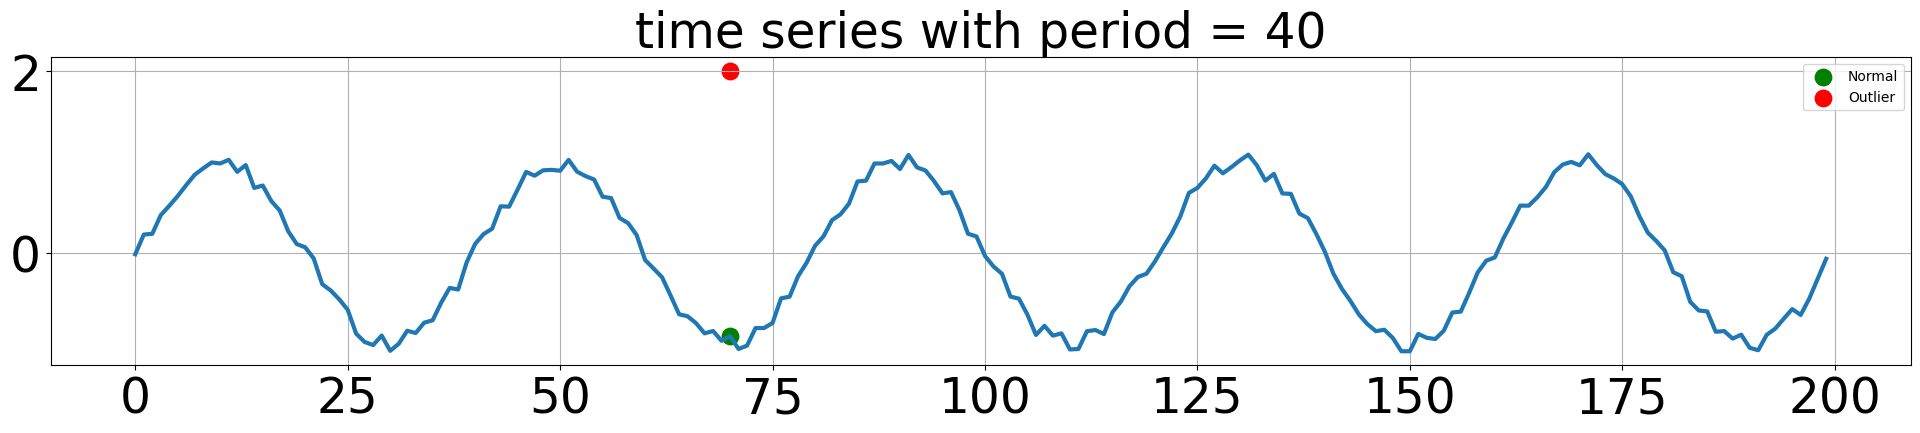

In [49]:
cols = 200 # length of time series
cycle = 40
random_seed = 1
np.random.seed(random_seed)
timestamp = np.full(cols,np.nan,dtype = int)
for i in range(cols):
    timestamp[i] = i
seasonal = np.full(cols,np.nan,dtype = float)
for i in range(cols):
    seasonal[i] = math.sin(2*math.pi/cycle*timestamp[i])
# const = np.full(cols,2,dtype = float)
noise = np.full(cols,0,dtype = float)
for i in range(cols):
    noise[i] = 0.2*(np.random.rand()-0.5)
# trend = 0.01*timestamp
ts = seasonal + noise
ts2 = ts.copy()
ts2[70] = 2

plt.figure(figsize = (24,4))
plt.plot(ts,linewidth =3.0)
plt.scatter(70, ts[70], color = 'green', s=140, label = "Normal")
plt.scatter(70, ts2[70], color = 'red', s=140, label = "Outlier")
plt.grid()
plt.tick_params(labelsize = 35)
plt.legend()
plt.title('time series with period = 40', fontsize = 35)
plt.savefig("plot_for_paper/raw_ts_include_outlier.pdf")

## Synthetic data

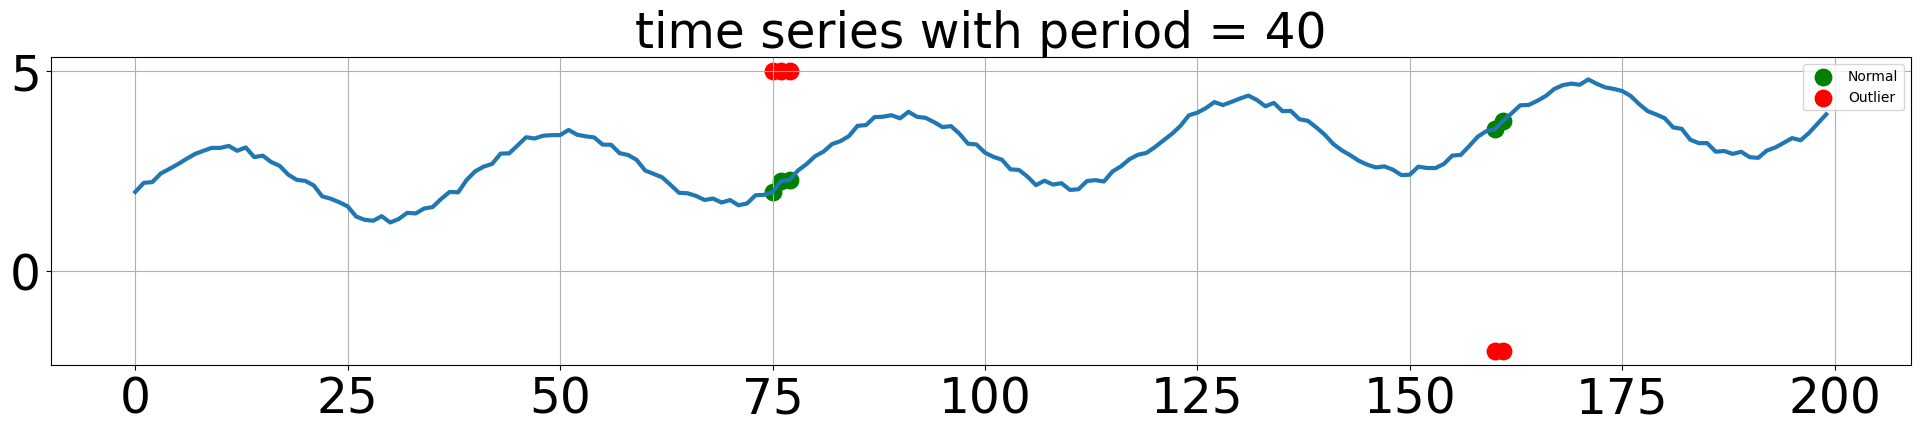

In [50]:
cols = 200 # length of time series
cycle = 40
random_seed = 1
np.random.seed(random_seed)
timestamp = np.full(cols,np.nan,dtype = int)
for i in range(cols):
    timestamp[i] = i
seasonal = np.full(cols,np.nan,dtype = float)
for i in range(cols):
    seasonal[i] = math.sin(2*math.pi/cycle*timestamp[i])
const = np.full(cols,2,dtype = float)
noise = np.full(cols,0,dtype = float)
for i in range(cols):
    noise[i] = 0.2*(np.random.rand()-0.5)
trend = 0.01*timestamp
ts = seasonal + const + noise + trend 
ts2 = ts.copy()
ts2[75] = 5
ts2[76] = 5
ts2[77] = 5
ts2[160] = -2
ts2[161] = -2
plt.figure(figsize = (24,4))
plt.plot(ts,linewidth =3.0)
plt.scatter([75, 76, 77, 160, 161], ts[[75, 76, 77, 160, 161]], color = 'green', s=140, label = "Normal")
plt.scatter([75, 76, 77, 160, 161], ts2[[75, 76, 77, 160, 161]], color = 'red', s=140, label = "Outlier")
plt.grid()
plt.tick_params(labelsize = 35)
plt.legend()
plt.title('time series with period = 40', fontsize = 35)
plt.savefig("plot_for_paper/raw_ts2_include_outlier.pdf")

# real data

### tsdl_271.csv

#### data

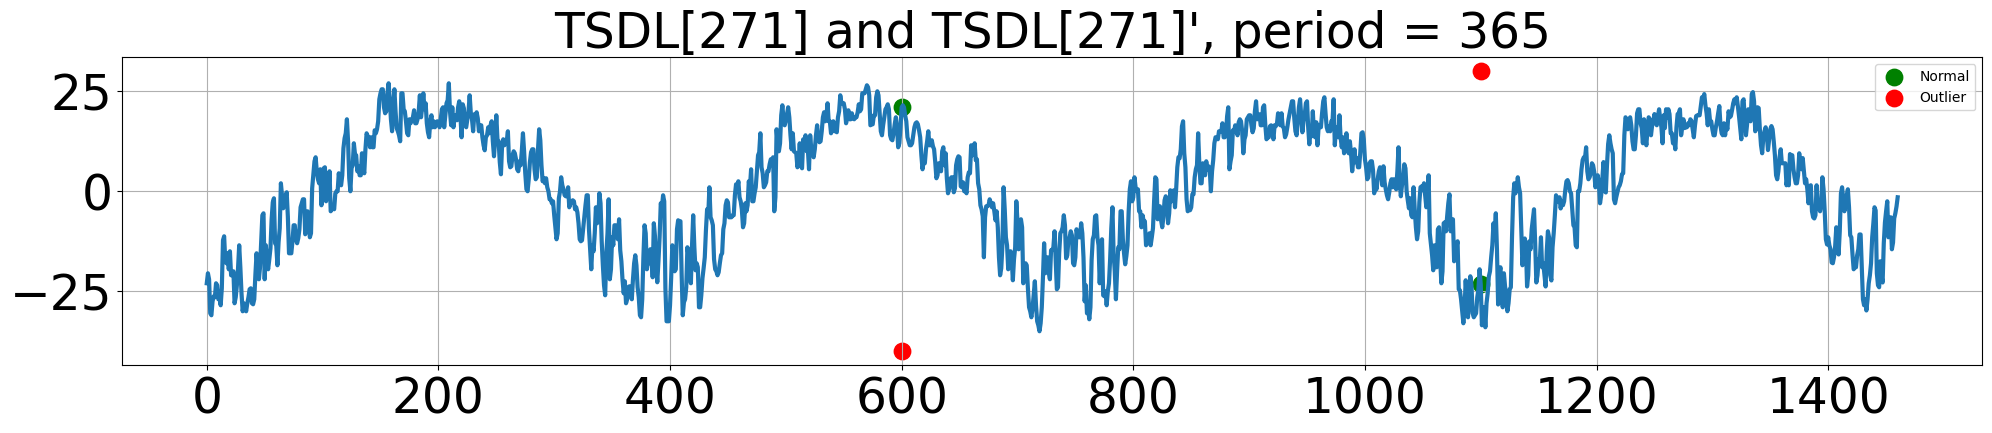

In [51]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_271.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
ts2 = ts.copy()
ts2[600] = -40
ts2[1100] = 30
plt.figure(figsize = (24, 4))
plt.plot(ts,linewidth =3.0)
plt.scatter([600, 1100], ts[[600, 1100]], color = 'green', s=140, label = "Normal")
plt.scatter([600, 1100], ts2[[600, 1100]], color = 'red', s=140, label = "Outlier")
plt.grid()
plt.tick_params(labelsize = 35)
plt.legend()
plt.title('TSDL[271] and TSDL[271]\', period = 365', fontsize = 35)
plt.savefig("plot_for_paper/tsdl_271_include_outlier.pdf")

#### outlier detection

Text(0.5, 1.0, 'outlier number = 0')

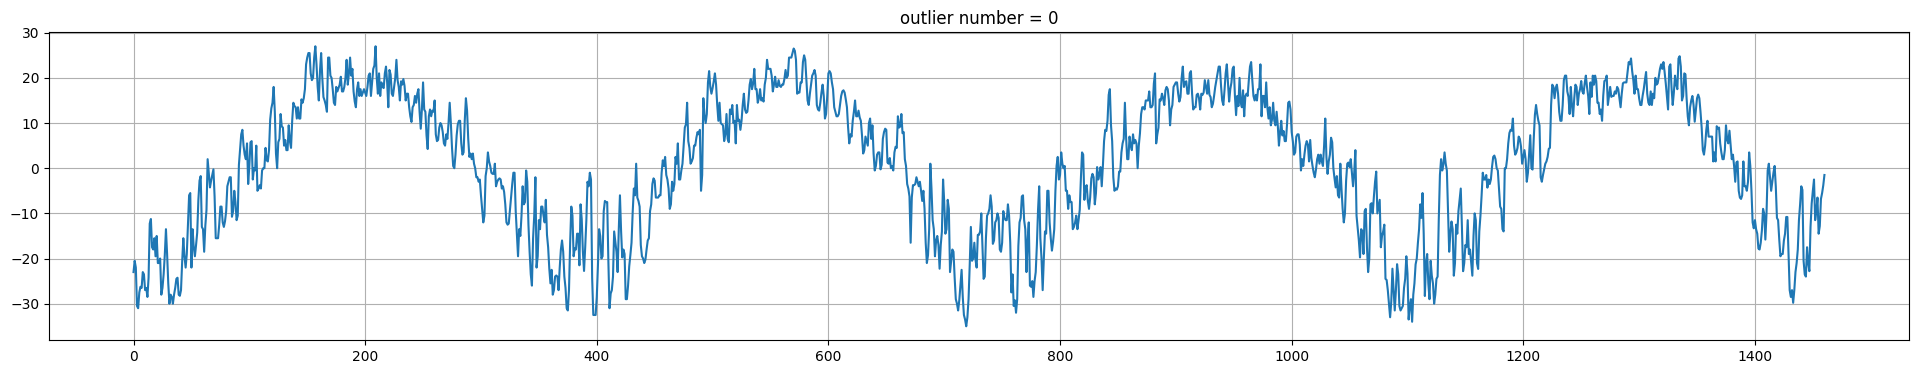

In [52]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_271.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
Z_score = Z_score_fun(ts)
outlier_detect_idx = outlier_detect_with_threshold(Z_score, threshold)
plt.figure(figsize = (24, 4))
plt.plot(ts)
plt.scatter(outlier_detect_idx, ts[outlier_detect_idx], color = "red")
plt.grid()
plt.title("outlier number = " + str(len(outlier_detect_idx)))

Text(0.5, 1.0, 'outlier number = 0')

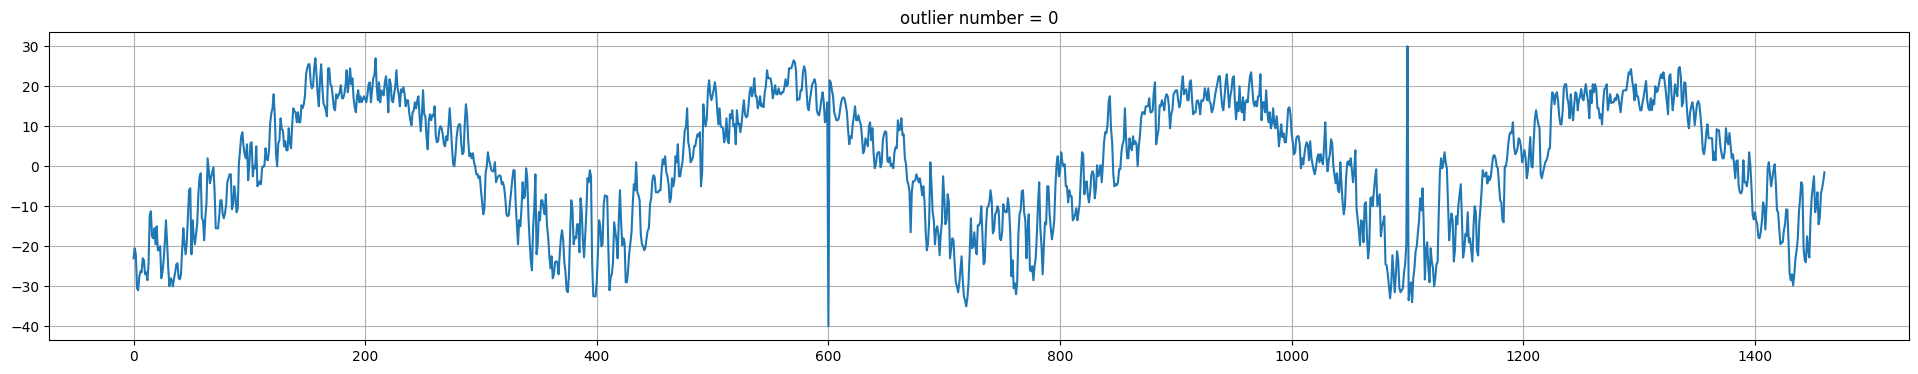

In [53]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_271.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
ts[600] = -40
ts[1100] = 30
Z_score = Z_score_fun(ts)
outlier_detect_idx = outlier_detect_with_threshold(Z_score, threshold)
plt.figure(figsize = (24, 4))
plt.plot(ts)
plt.scatter(outlier_detect_idx, ts[outlier_detect_idx], color = "red")
plt.grid()
plt.title("outlier number = " + str(len(outlier_detect_idx)))

### tsdl_331.csv

#### data

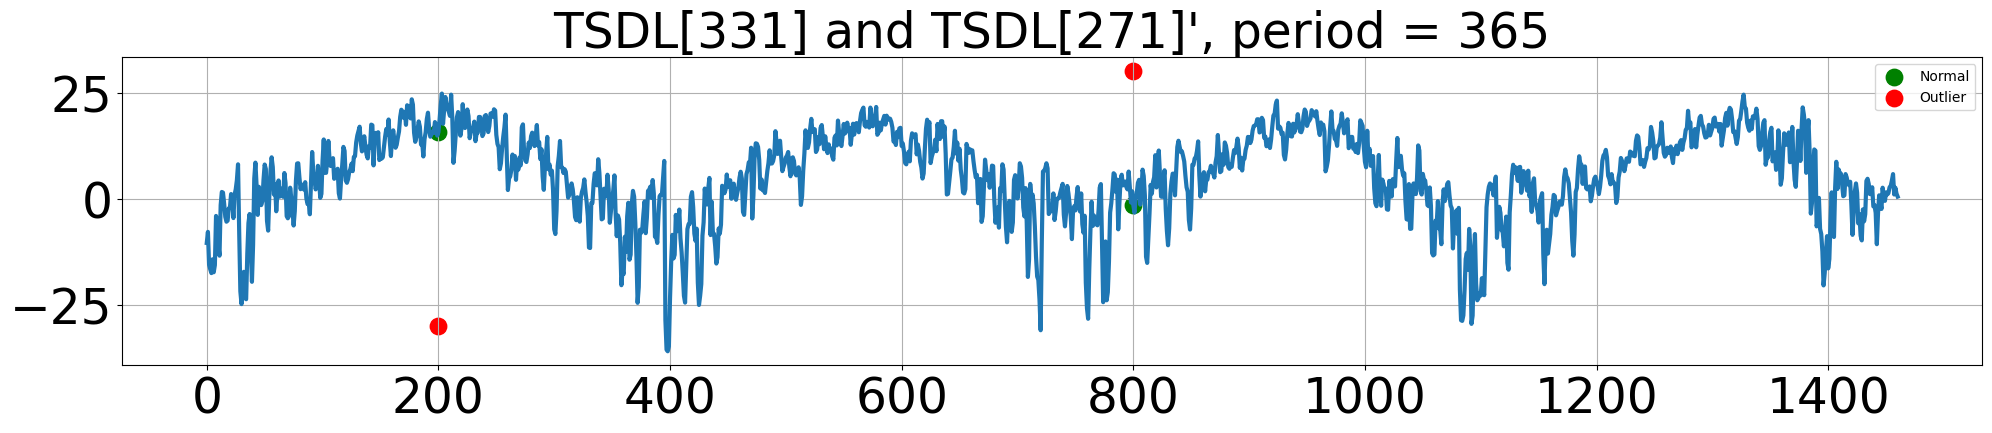

In [54]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_331.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
ts2 = ts.copy()
ts2[200] = -30
ts2[800] = 30
plt.figure(figsize = (24, 4))
plt.plot(ts,linewidth =3.0)
plt.scatter([200, 800], ts[[200, 800]], color = 'green', s=140, label = "Normal")
plt.scatter([200, 800], ts2[[200, 800]], color = 'red', s=140, label = "Outlier")
plt.tick_params(labelsize = 35)
plt.grid()
plt.legend()
plt.title('TSDL[331] and TSDL[271]\', period = 365', fontsize = 35)
plt.savefig("plot_for_paper/tsdl_331_include_outlier.pdf")

#### outlier detection

Text(0.5, 1.0, 'outlier number = 12')

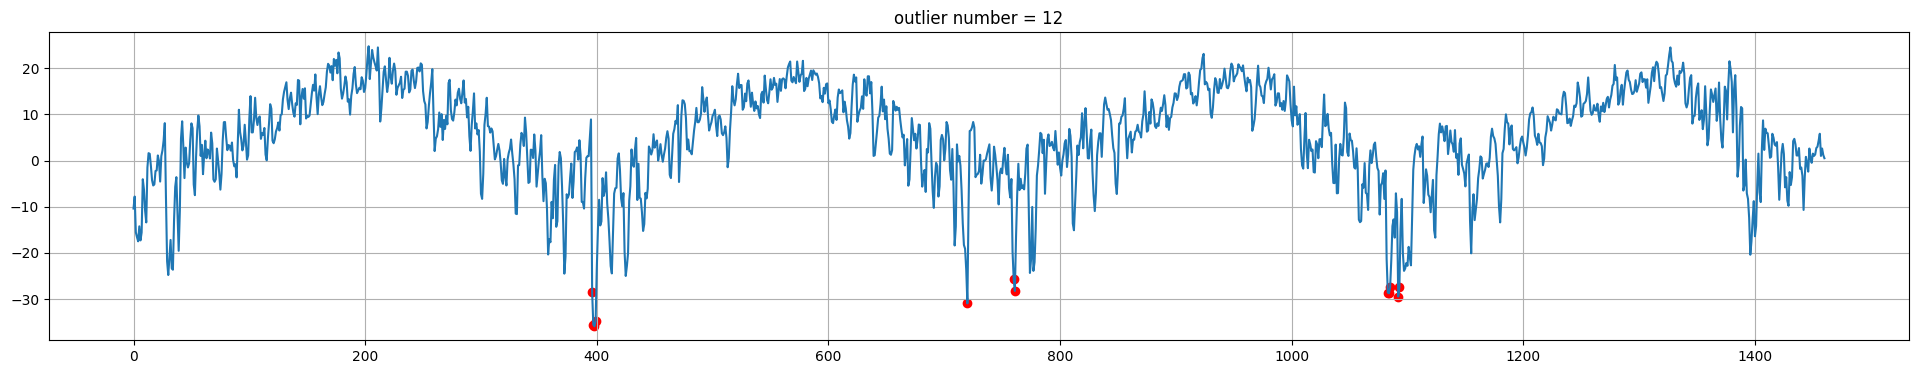

In [55]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_331.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
Z_score = Z_score_fun(ts)
outlier_detect_idx = outlier_detect_with_threshold(Z_score, threshold)
plt.figure(figsize = (24, 4))
plt.plot(ts)
plt.scatter(outlier_detect_idx, ts[outlier_detect_idx], color = "red")
plt.grid()
plt.title("outlier number = " + str(len(outlier_detect_idx)))

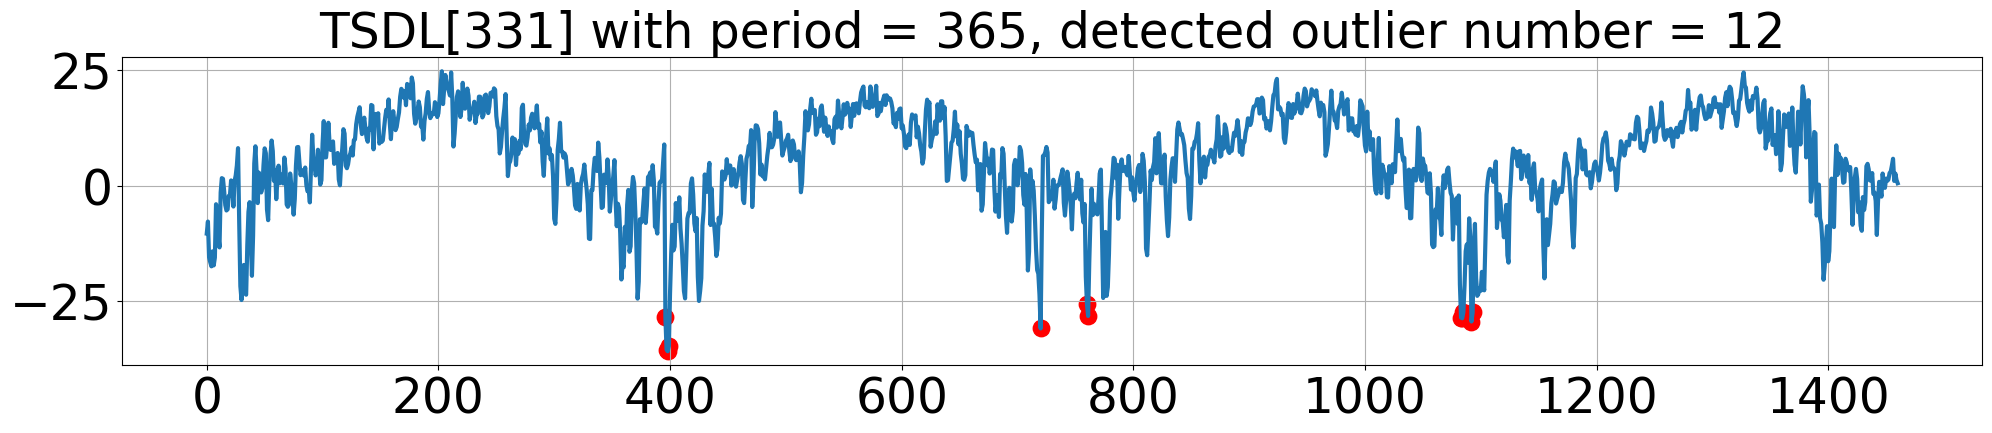

In [56]:
plt.figure(figsize = (24, 4))
plt.plot(ts,linewidth =3.0)
plt.scatter(outlier_detect_idx, ts[outlier_detect_idx], color = "red", s = 140)
plt.tick_params(labelsize = 35)
plt.grid()
plt.title('TSDL[331] with period = 365, detected outlier number = ' + str(len(outlier_detect_idx)), fontsize = 35)
plt.savefig("plot_for_paper/tsdl_331_3sigma.pdf")

Text(0.5, 1.0, 'outlier number = 12')

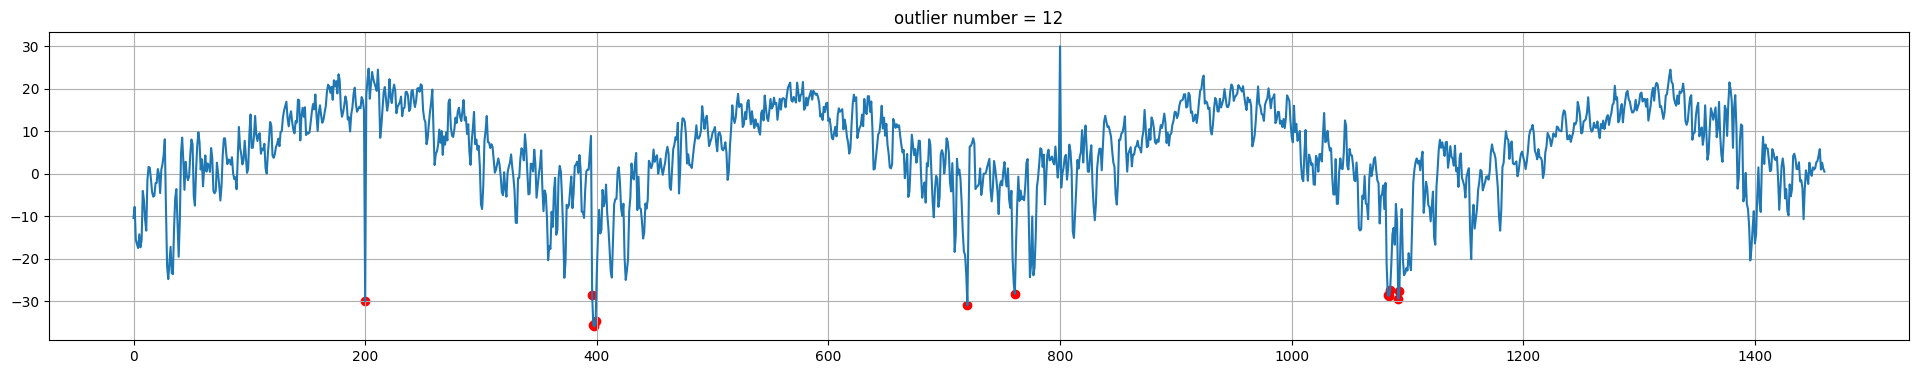

In [57]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_331.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
ts[200] = -30
ts[800] = 30
Z_score = Z_score_fun(ts)
outlier_detect_idx = outlier_detect_with_threshold(Z_score, threshold)
plt.figure(figsize = (24, 4))
plt.plot(ts)
plt.scatter(outlier_detect_idx, ts[outlier_detect_idx], color = "red")
plt.grid()
plt.title("outlier number = " + str(len(outlier_detect_idx)))

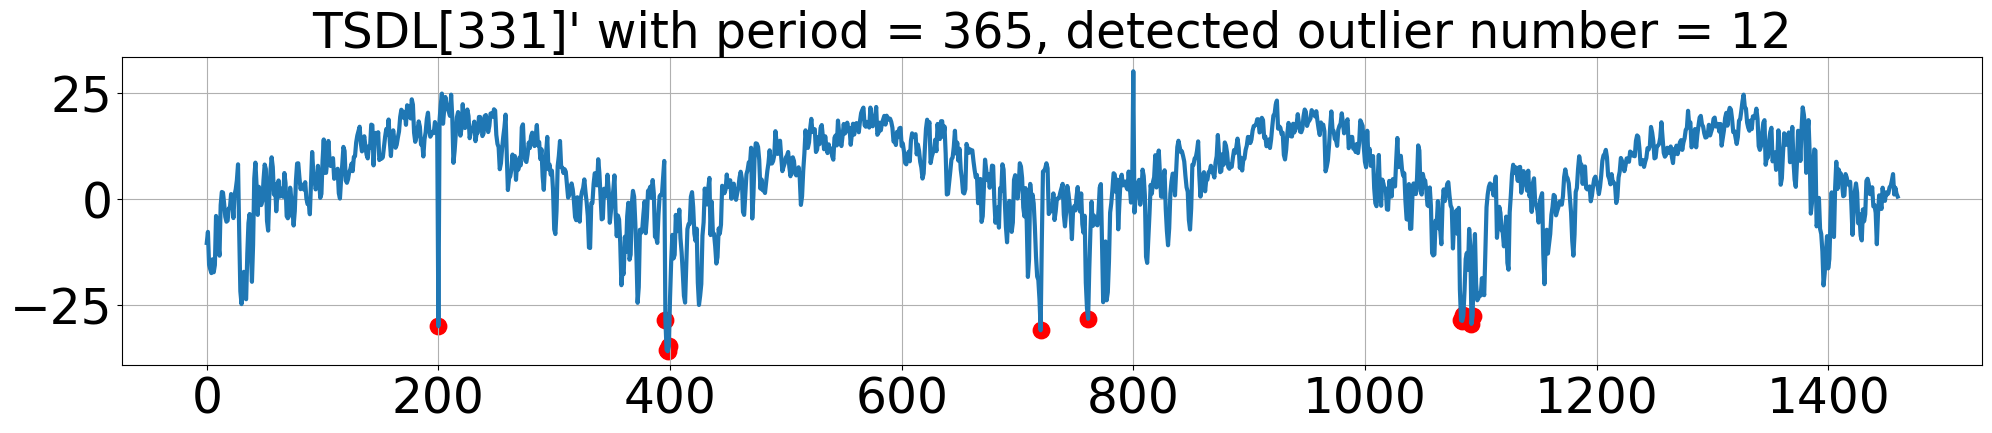

In [58]:
plt.figure(figsize = (24, 4))
plt.plot(ts,linewidth =3.0)
plt.scatter(outlier_detect_idx, ts[outlier_detect_idx], color = "red", s = 140)
plt.tick_params(labelsize = 35)
plt.grid()
plt.title('TSDL[331]\' with period = 365, detected outlier number = ' + str(len(outlier_detect_idx)), fontsize = 35)
plt.savefig("plot_for_paper/tsdl_331_outlier_3sigma.pdf")

Text(0.5, 1.0, 'outlier number = 13')

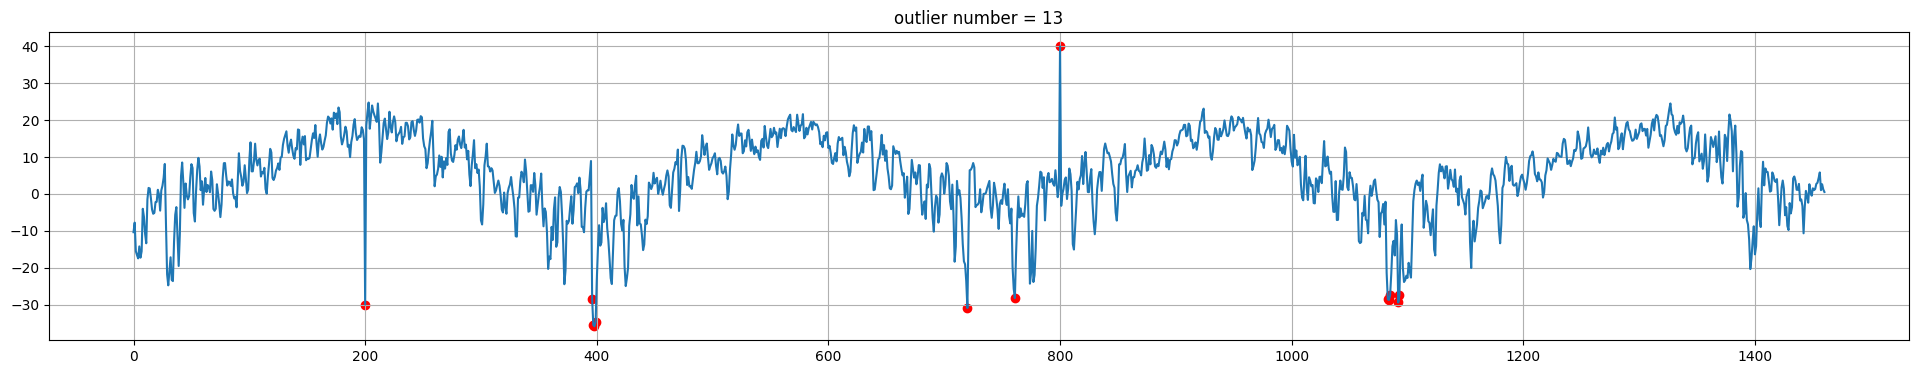

In [59]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_331.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
ts[200] = -30
ts[800] = 40
Z_score = Z_score_fun(ts)
outlier_detect_idx = outlier_detect_with_threshold(Z_score, threshold)
plt.figure(figsize = (24, 4))
plt.plot(ts)
plt.scatter(outlier_detect_idx, ts[outlier_detect_idx], color = "red")
plt.grid()
plt.title("outlier number = " + str(len(outlier_detect_idx)))

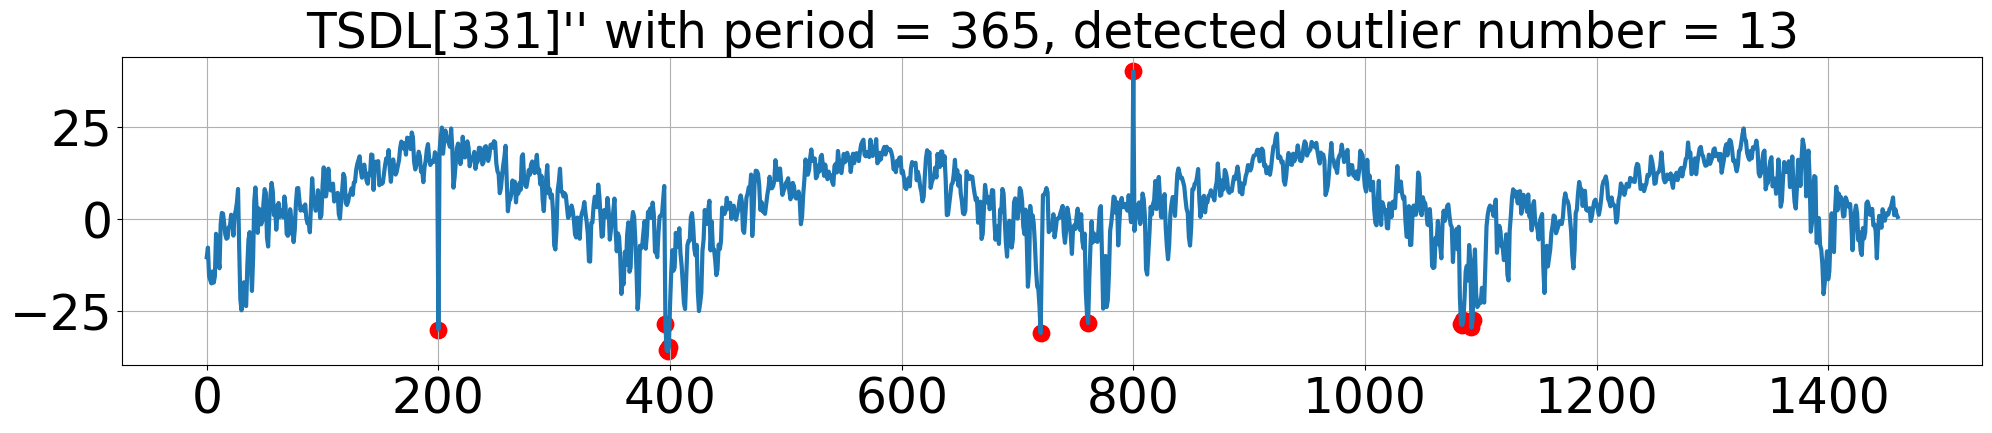

In [60]:
plt.figure(figsize = (24, 4))
plt.plot(ts,linewidth =3.0)
plt.scatter(outlier_detect_idx, ts[outlier_detect_idx], color = "red", s = 140)
plt.tick_params(labelsize = 35)
plt.grid()
plt.title('TSDL[331]\'\' with period = 365, detected outlier number = ' + str(len(outlier_detect_idx)), fontsize = 35)
plt.savefig("plot_for_paper/tsdl_331_outlier2_3sigma.pdf")

### tsdl_91.csv, weekly

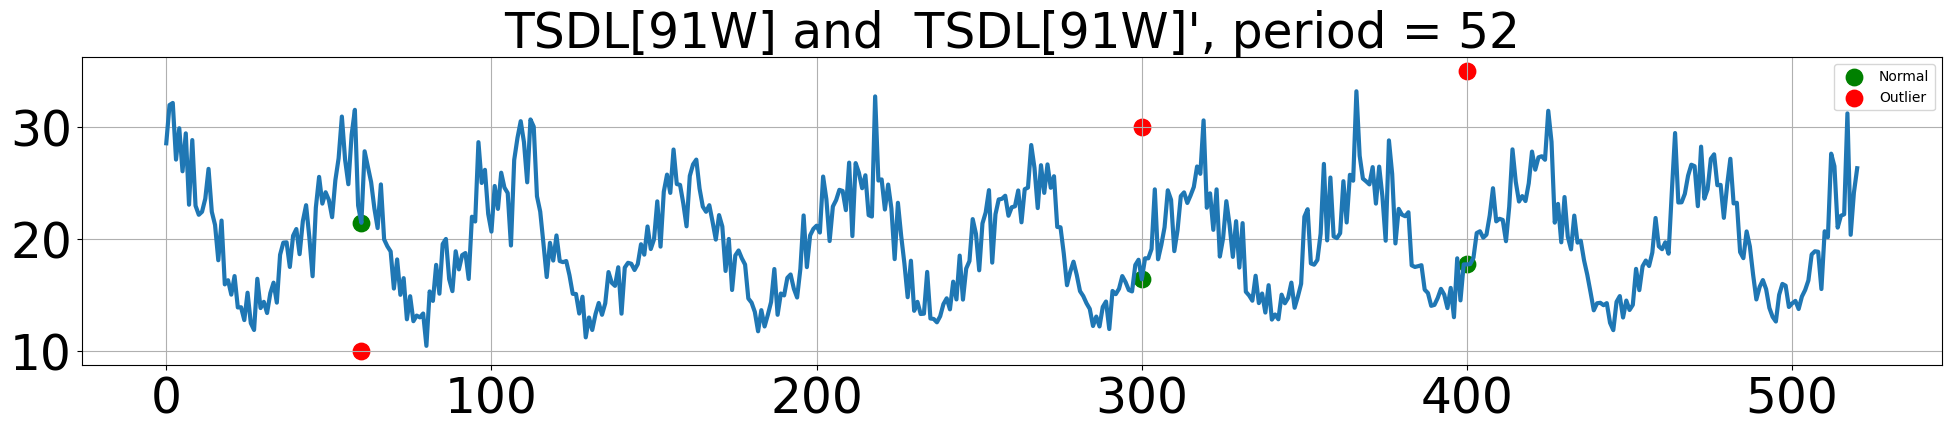

In [61]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_91.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
num_w = int(num/7)
ts_w = np.full(num_w,np.nan)
for i in range(num_w):
    ts_w[i] = np.mean(ts[7*i:7*i+7])
ts_w2 = ts_w.copy()
ts_w2[60] = 10
ts_w2[400] = 35
ts_w2[300] = 30
plt.figure(figsize = (24, 4))
plt.plot(ts_w,linewidth =3.0)
plt.scatter([60, 300, 400], ts_w[[60, 300, 400]], color = 'green', s=140, label = "Normal")
plt.scatter([60, 300, 400], ts_w2[[60, 300, 400]], color = 'red', s=140, label = "Outlier")
plt.tick_params(labelsize = 35)
plt.grid()
plt.legend()
plt.title('TSDL[91W] and  TSDL[91W]\', period = 52', fontsize = 35)
plt.savefig("plot_for_paper/tsdl_91w_include_outlier.pdf")

### tsdl_92.csv, weekly

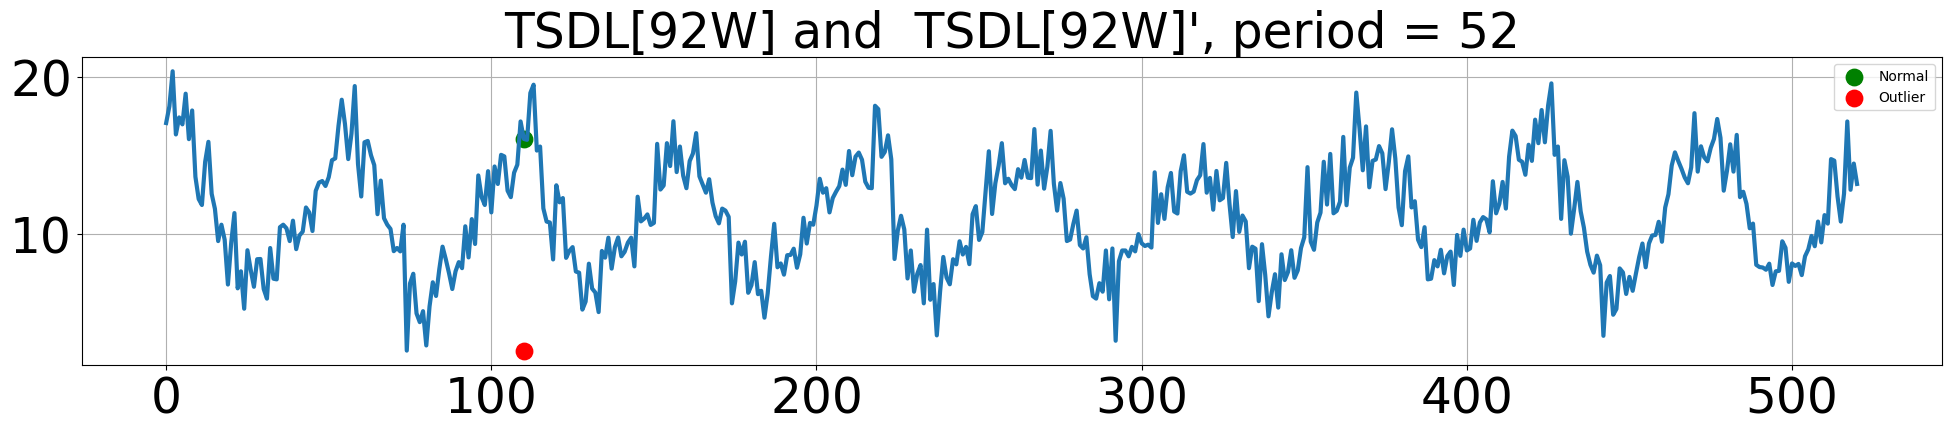

In [62]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_92.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
num_w = int(num/7)
ts_w = np.full(num_w,np.nan)
for i in range(num_w):
    ts_w[i] = np.mean(ts[7*i:7*i+7])
ts_w2 = ts_w.copy()
ts_w2[110] = 2.5
plt.figure(figsize = (24, 4))
plt.plot(ts_w,linewidth =3.0)
plt.scatter([110], ts_w[[110]], color = 'green', s=140, label = "Normal")
plt.scatter([110], ts_w2[[110]], color = 'red', s=140, label = "Outlier")
plt.tick_params(labelsize = 35)
plt.grid()
plt.legend()
plt.title('TSDL[92W] and  TSDL[92W]\', period = 52', fontsize = 35)
plt.savefig("plot_for_paper/tsdl_92w_include_outlier.pdf")

### tsdl_244.csv

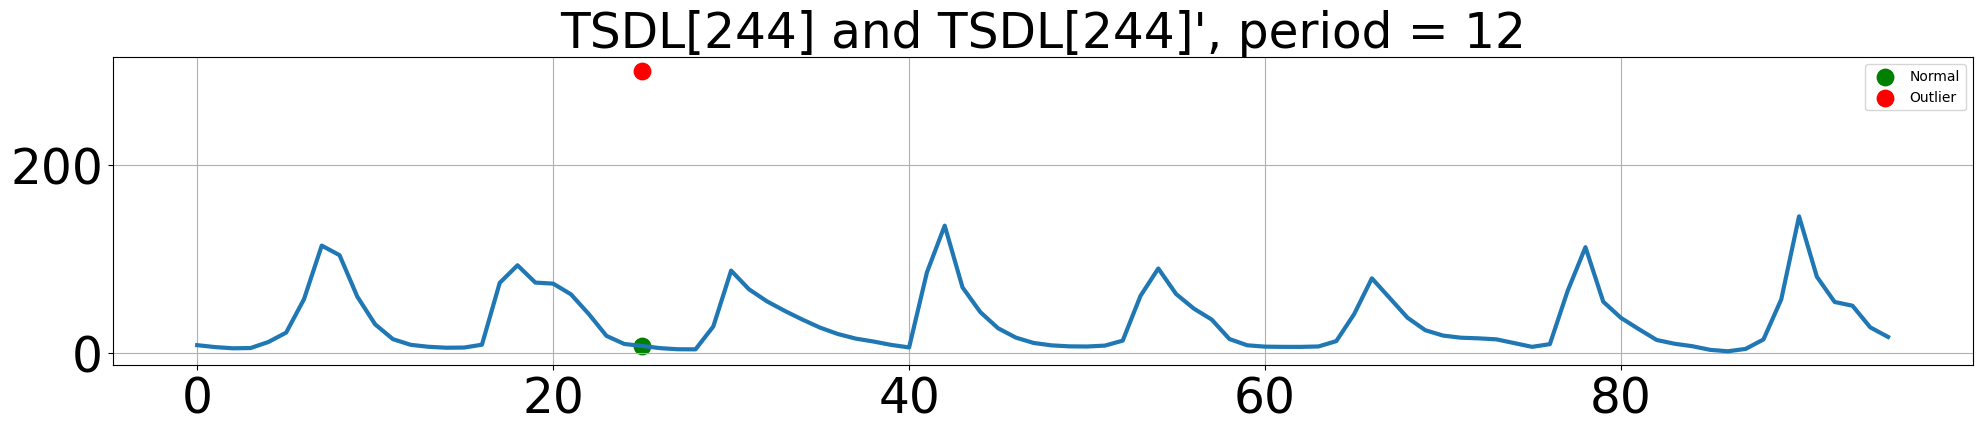

In [63]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_244.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
ts2 = ts.copy()
ts2[25] = 300
plt.figure(figsize = (24, 4))
plt.plot(ts,linewidth =3.0)
plt.scatter([25], ts[[25]], color = 'green', s=140, label = "Normal")
plt.scatter([25], ts2[[25]], color = 'red', s=140, label = "Outlier")
plt.tick_params(labelsize = 35)
plt.grid()
plt.legend()
plt.title('TSDL[244] and TSDL[244]\', period = 12', fontsize = 35)
plt.savefig("plot_for_paper/tsdl_244_include_outlier.pdf")

### tsdl_358.csv

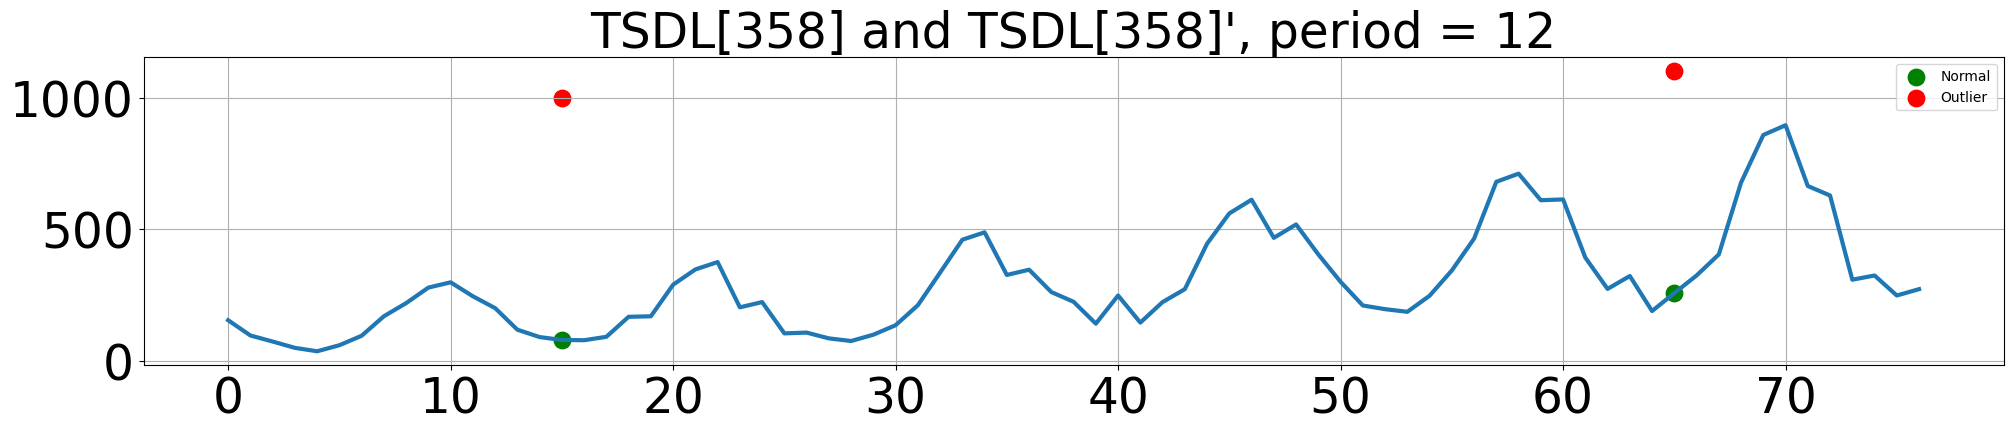

In [64]:
str_path = 'data/tsdl_data/'
df = pd.read_csv(str_path+'tsdl_358.csv')
num = len(df)
ts = np.full(num,np.nan)
for i in range(num):
    ts[i] = df['value'][i]
ts2[15] = 1000
ts2[65] = 1100
plt.figure(figsize = (24, 4))
plt.plot(ts,linewidth =3.0)
plt.scatter([15, 65], ts[[15, 65]], color = 'green', s=140, label = "Normal")
plt.scatter([15, 65], ts2[[15, 65]], color = 'red', s=140, label = "Outlier")
plt.tick_params(labelsize = 35)
plt.grid()
plt.legend()
plt.title('TSDL[358] and TSDL[358]\', period = 12', fontsize = 35)
plt.savefig("plot_for_paper/tsdl_358_include_outlier.pdf")